# **06-05 로지스틱 회귀(Logistic Regression)**

---



이진 분류 (Binary Classification) : 둘 중 하나를 결정하는 문제

이진 분류 문제의 대표적 알고리즘, 로지스틱 회귀(Logistic Regression)

ex) 시험 합격 여부, 정상/스팸 메일 분류

## **1. 이진 분류 (Binary Classification)**

---



학생들 시험 성적에 따라 합격, 불합격 기재된 데이터

x: 시험 성적, y: 합불 결과

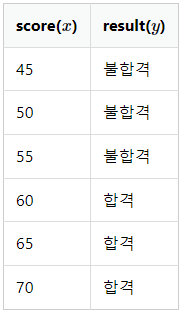

**합격 1, 불합격 0**

> 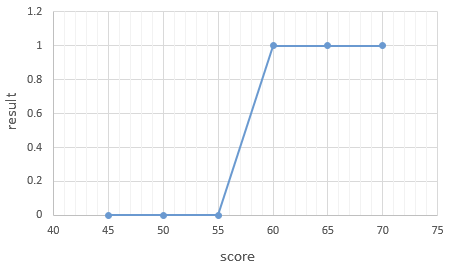



실제값 y가 0 또는 1 값만 가지므로, 예측값은 0 ~ 1

(최종 예측값) < 0.5 = 0으로 예측, (최종 예측값) > 0.5 = 1로 예측

출력이 0과 1 사이의 값을 가지므로 **S자 형태**로 표현

## **2. 시그모이드 함수 (Sigmoid function, image.png)**

---



로지스틱 회귀 풀기 위한 가설 , e(=2.718281...) : 자연 상수


> 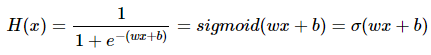

sigmoid function 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

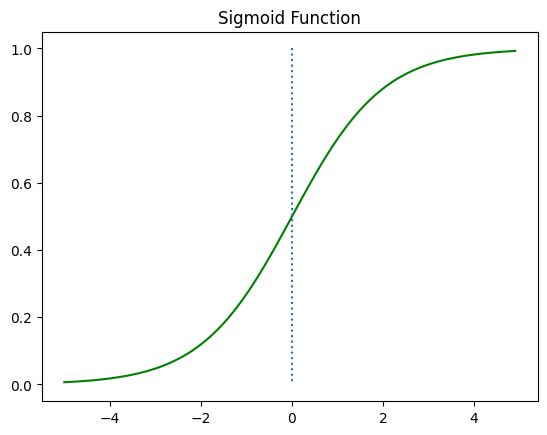

In [2]:
# w=1, b=0
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

***x***=0일 때 출력값 0.5, ***x***가 증가하면 1에 수렴

#### **1)** ***w*** 값 변화시켰을 때의 그래프 확인해보기

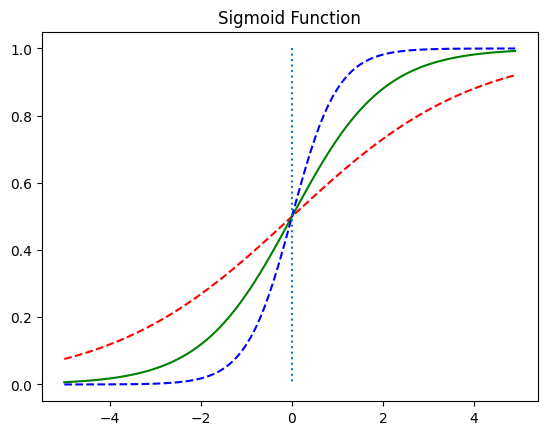

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w=0.5 (red)
plt.plot(x, y2, 'g') # w=1 (green)
plt.plot(x, y3, 'b', linestyle='--') # w=2 (blue)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

***w*** 값에 따른 그래프의 경사도 변화 (***w*** 커지면 경사도 커짐)

#### **2)** ***b*** 값 변화시켰을 때의 그래프 확인해보기

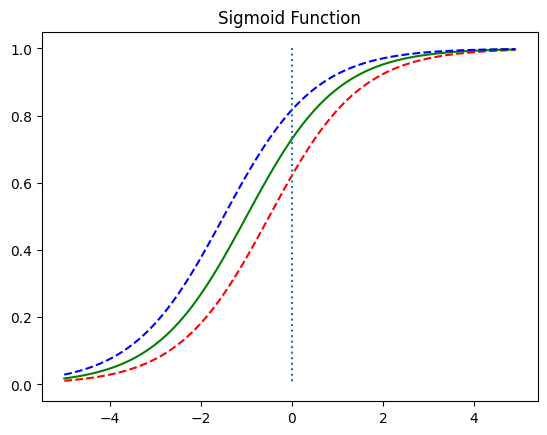

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5 (red)
plt.plot(x, y2, 'g') # x + 1 (green)
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5 (blue)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

***b*** 값에 따라 그래프 이동

## **3. 비용 함수 (Cost function)**

---



로지스틱 회귀 또한 경사하강법으로 w 찾아내지만, 비용 함수로는 mse 사용 X

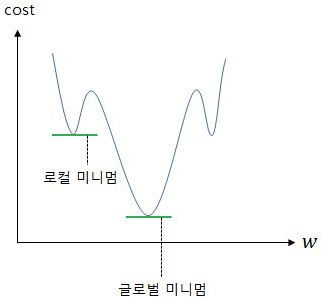

mse를 사용하면, 잘못된 최솟값에 빠질 가능성 높음

= **글로벌 미니멈(Global Minimum)**이 아닌 **로컬 미니멈(Local Minimum)**에 도달

목적 함수(objective function), ***J*** : 가중치 ***w***를 최소로 만드는 적절한 비용 함수

> 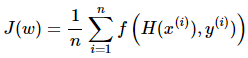

***n***: 샘플 데이터 개수, 함수 ***f***: 실제값 y와 예측값 H(x)의 오차 나타낸 함수

함수 ***f***를 어떻게 정의하느냐에 따라 가중치를 최소화하는 적절한 목적 함수 완성

이때 목적 함수는 전체 데이터에 대해 함수 ***f***의 값의 평균을 계산하고 있으므로, ***f***는 비용 함수(cost function)

> 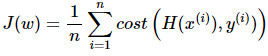



실제값 y=0일 때, H(x)값이 1에 가까워지면 오차 커짐 (반대 상황도 마찬가지)

로그 함수를 통해 표현 가능

image.png

image.png

> 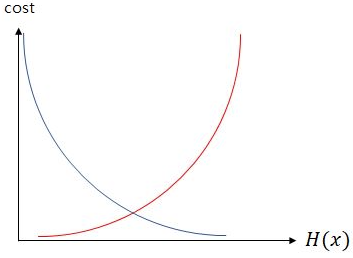



> 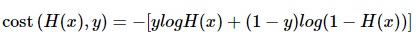

***y***가 0이면 image.png 없어지고, ***y***가 1이면 image.png가 없어지므로 앞서 본 식과 동일

결과적으로, 로지스틱 회귀의 목적 함수는 다음과 같음

> 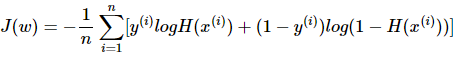

이때 찾아낸 cost함수: **크로스 엔트로피(Cross Entropy) 함수**